### Naive Bayes Training Script
#### Author: Austin Fernandez
#### Date Modified: April 25, 2020

In [1]:
# dependencies
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.naive_bayes import CategoricalNB, ComplementNB, MultinomialNB, GaussianNB
# from sklearn.naive_bayes import ComplementNB, MultinomialNB
import numpy as np
from scipy.stats import uniform, norm
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
from XLB import *

import warnings
warnings.filterwarnings('ignore')

In [2]:
x_train, y_train = extract_data("FinalTrainingSet.csv")
x_val, y_val = extract_data("Validation Set.csv")
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)

scaler_val = MinMaxScaler()
scaler.fit(x_val)
x_val = scaler.transform(x_val)

(397, 327)
(397, 324)
(397,)
(22, 327)
(22, 324)
(22,)


In [3]:
rand_seed = 3454132

oversampler = SMOTE(sampling_strategy="not majority",random_state=rand_seed)

x_smote, y_smote = oversampler.fit_resample(x_train,y_train)

print(x_smote.shape,y_smote.shape)

oversampler = RandomOverSampler(sampling_strategy="not majority",random_state=rand_seed)

x_os, y_os = oversampler.fit_resample(x_train,y_train)

print(x_os.shape,y_os.shape)

(822, 324) (822,)
(822, 324) (822,)


In [4]:
# GaussianNB, GridSearch
k_folds = 5

parameters = {
    'var_smoothing' : [j / np.power(10,x) for x in range(1,10) for j in range(1,10)]
}
cnb = GaussianNB()
grid_search_gaussian = GridSearchCV(cnb, parameters,cv=k_folds,n_jobs=-1)

Best Score: 0.3606
var_smoothing => 0.9
Splits: 5
Vanilla Train Accuracy: 53.4005%
Vanilla Validation Accuracy: 36.36%


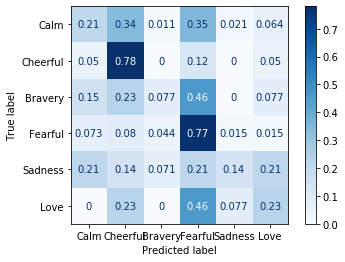

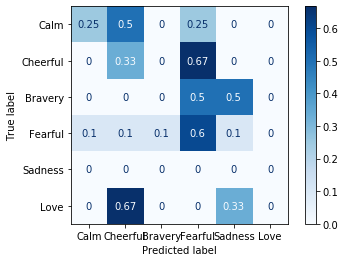

In [5]:
print_res("Vanilla",x_train,y_train,grid_search_gaussian)
test_res("Vanilla",x_val,y_val,grid_search_gaussian)

Best Score: 0.3383
var_smoothing => 0.4
Splits: 5
Random Oversampling Train Accuracy: 36.2530%
Random Oversampling Validation Accuracy: 27.27%


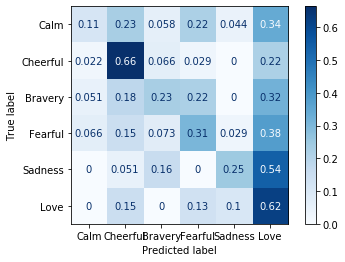

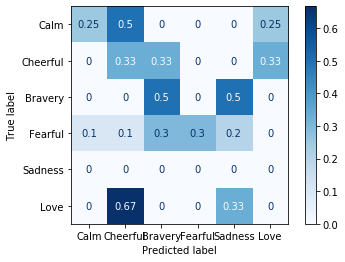

In [6]:
print_res("Random Oversampling",x_os,y_os,grid_search_gaussian)
test_res("Random Oversampling",x_val,y_val,grid_search_gaussian)

Best Score: 0.3480
var_smoothing => 1e-05
Splits: 5
SMOTE Train Accuracy: 40.3893%
SMOTE Validation Accuracy: 40.91%


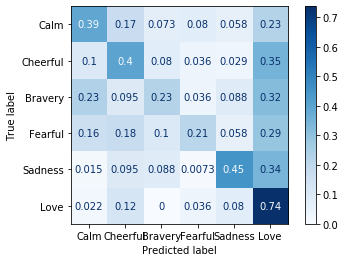

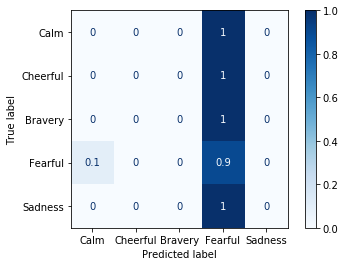

In [7]:
print_res("SMOTE",x_smote,y_smote,grid_search_gaussian)
test_res("SMOTE",x_val,y_val,grid_search_gaussian)

In [8]:
# MultinomialNB, Grid Search
k_folds = 5
parameters = {
    'alpha':[0.01 * i for i in range(1,101)], 
    'fit_prior':[True, False]
}
mnb = MultinomialNB()
grid_search_multinomial = GridSearchCV(mnb, parameters,cv=k_folds,n_jobs=-1)

Best Score: 0.5244
alpha => 0.01
fit_prior => True
Splits: 5
Vanilla Train Accuracy: 52.1411%
Vanilla Validation Accuracy: 40.91%


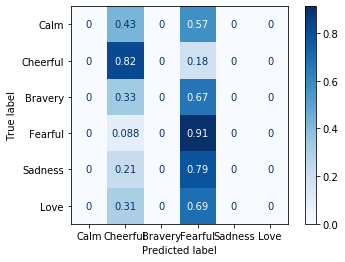

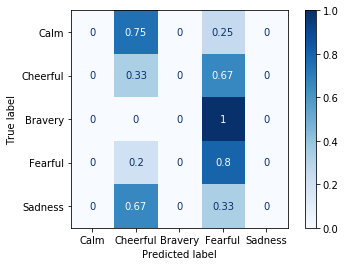

In [10]:
print_res("Vanilla",x_train[:,:5],y_train,grid_search_multinomial)
test_res("Vanilla",x_val[:,:5],y_val,grid_search_multinomial)

Best Score: 0.2945
alpha => 0.01
fit_prior => True
Splits: 5
Random Oversampling Train Accuracy: 31.7518%
Random Oversampling Validation Accuracy: 22.73%


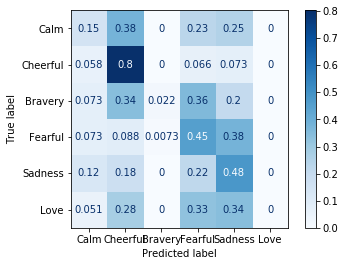

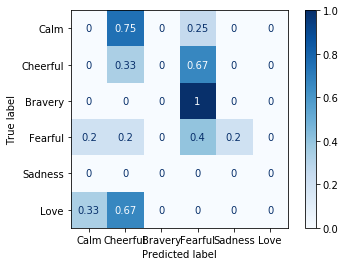

In [11]:
print_res("Random Oversampling",x_os[:,:5],y_os,grid_search_multinomial)
test_res("Random Oversampling",x_val[:,:5],y_val,grid_search_multinomial)

Best Score: 0.3140
alpha => 0.01
fit_prior => False
Splits: 5
SMOTE Train Accuracy: 32.1168%
SMOTE Validation Accuracy: 4.55%


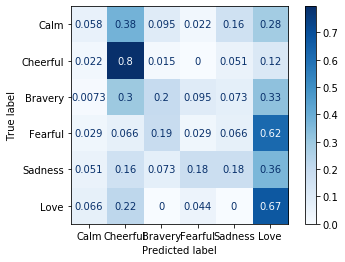

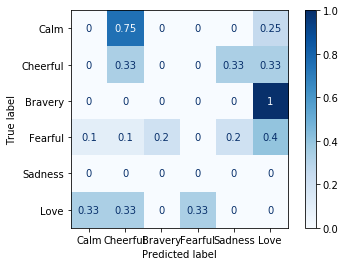

In [12]:
print_res("SMOTE",x_smote[:,:5],y_smote,grid_search_multinomial)
test_res("SMOTE",x_val[:,:5],y_val,grid_search_multinomial)

In [13]:
# CategoricalNB, Grid Search
k_folds = 5
parameters = {
    'alpha':[0.01 * i for i in range(1,101)], 
    'fit_prior':[True, False]
}
canb = CategoricalNB()
grid_search_categorical = GridSearchCV(canb, parameters,cv=k_folds)

Best Score: 0.5118
alpha => 0.01
fit_prior => True
Splits: 5
Vanilla Train Accuracy: 52.6448%
Vanilla Validation Accuracy: 40.91%


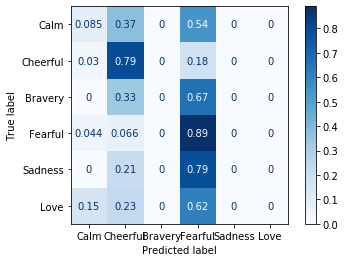

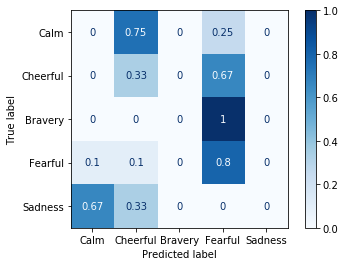

In [14]:
print_res("Vanilla",x_train[:,:5],y_train,grid_search_categorical)
test_res("Vanilla",x_val[:,:5],y_val,grid_search_categorical)

Best Score: 0.3164
alpha => 0.01
fit_prior => True
Splits: 5
Random Oversampling Train Accuracy: 32.1168%
Random Oversampling Validation Accuracy: 13.64%


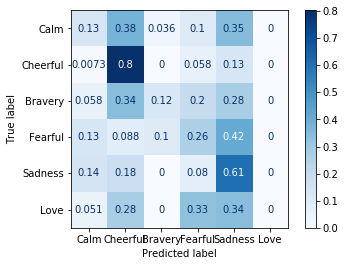

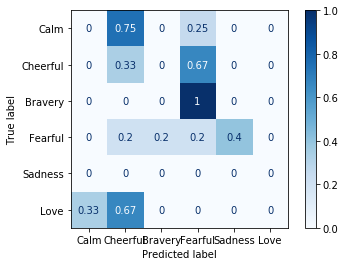

In [15]:
print_res("Random Oversampling",x_os[:,:5],y_os,grid_search_categorical)
test_res("Random Oversampling",x_val[:,:5],y_val,grid_search_categorical)

Best Score: 0.3797
alpha => 0.01
fit_prior => True
Splits: 5
SMOTE Train Accuracy: 39.5377%
SMOTE Validation Accuracy: 13.64%


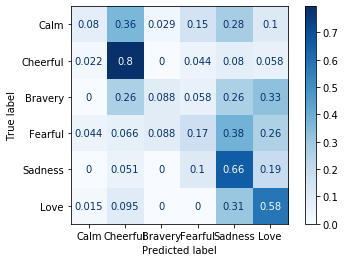

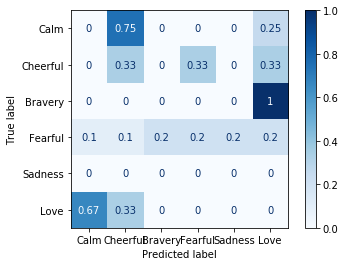

In [16]:
print_res("SMOTE",x_smote[:,:5],y_smote,grid_search_categorical)
test_res("SMOTE",x_val[:,:5],y_val,grid_search_categorical)

In [17]:
# ComplementNB, Grid Search
k_folds = 5
parameters = {
    'alpha':[0.01 * i for i in range(1,101)], 
    'fit_prior':[True, False], 
    'norm' : [True, False]}
cnb = ComplementNB()
grid_search_complement = GridSearchCV(cnb, parameters,cv=k_folds,n_jobs=-1)

Best Score: 0.4214
alpha => 0.93
fit_prior => True
norm => False
Splits: 5
Vanilla Train Accuracy: 54.6599%
Vanilla Validation Accuracy: 13.64%


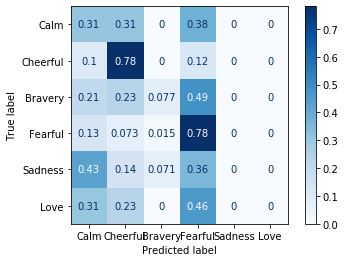

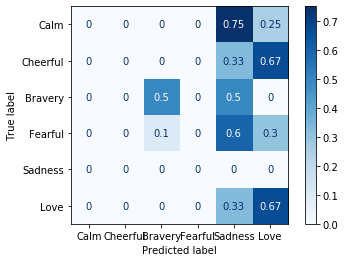

In [18]:
print_res("Vanilla",x_train,y_train,grid_search_complement)
test_res("Vanilla",x_val,y_val,grid_search_complement)

Best Score: 0.3943
alpha => 0.05
fit_prior => True
norm => True
Splits: 5
Random Oversampling Train Accuracy: 39.9027%
Random Oversampling Validation Accuracy: 13.64%


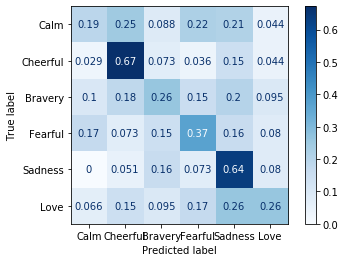

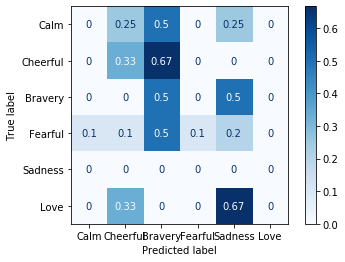

In [19]:
print_res("Random Oversampling",x_os,y_os,grid_search_complement)
test_res("Random Oversampling",x_val,y_val,grid_search_complement)

Best Score: 0.3882
alpha => 0.01
fit_prior => True
norm => False
Splits: 5
SMOTE Train Accuracy: 41.1192%
SMOTE Validation Accuracy: 13.64%


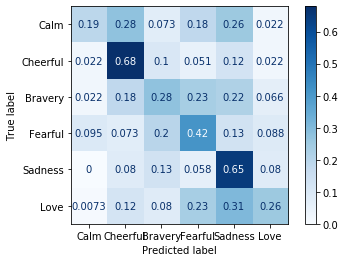

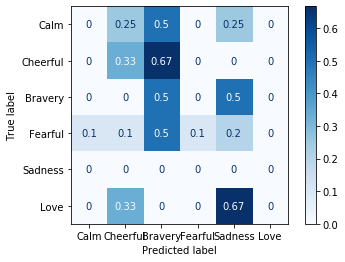

In [20]:
print_res("SMOTE",x_smote,y_smote,grid_search_complement)
test_res("SMOTE",x_val,y_val,grid_search_complement)

In [21]:
# ComplementNB, RandomizedSearch
random_search_iterations = 1000
k_folds = 5
rand_seed = 3249807

parameters = {
    'alpha':uniform(loc=0,scale=1.0), 
    'fit_prior':[True, False], 
    'norm' : [True, False]
}
cnb = ComplementNB()
random_search_complement = RandomizedSearchCV(cnb, parameters,cv=k_folds,\
                                              n_iter=random_search_iterations,\
                                              random_state=rand_seed,n_jobs=-1)

Best Score: 0.4214
alpha => 0.9868336008547082
fit_prior => False
norm => False
Splits: 5
Vanilla Train Accuracy: 54.6599%
Vanilla Validation Accuracy: 13.64%


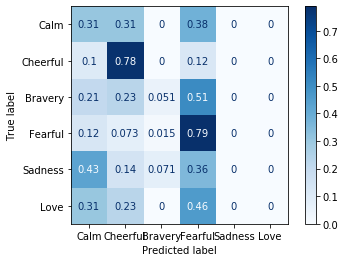

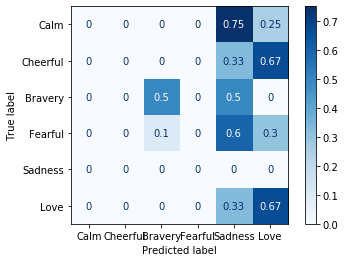

In [22]:
print_res("Vanilla",x_train,y_train,random_search_complement)
test_res("Vanilla",x_val,y_val,random_search_complement)

Best Score: 0.3968
alpha => 6.408338343788511e-05
fit_prior => True
norm => True
Splits: 5
Random Oversampling Train Accuracy: 40.2676%
Random Oversampling Validation Accuracy: 13.64%


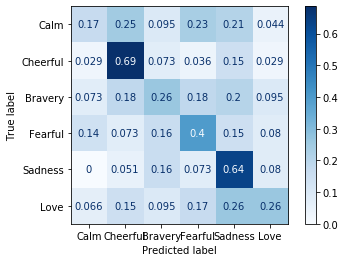

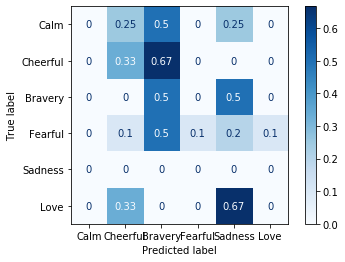

In [23]:
print_res("Random Oversampling",x_os,y_os,random_search_complement)
test_res("Random Oversampling",x_val,y_val,random_search_complement)

Best Score: 0.3882
alpha => 0.2557277072168217
fit_prior => False
norm => False
Splits: 5
SMOTE Train Accuracy: 41.1192%
SMOTE Validation Accuracy: 41.12%


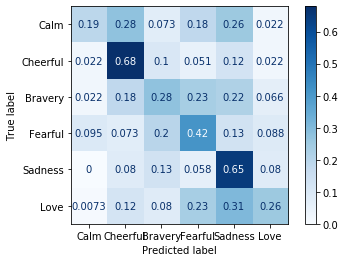

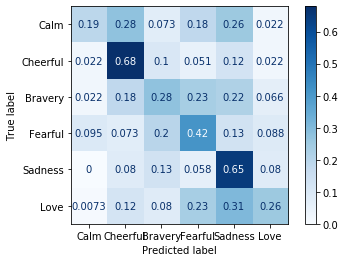

In [24]:
print_res("SMOTE",x_smote,y_smote,random_search_complement)
test_res("SMOTE",x_smote,y_smote,random_search_complement)

In [25]:
# CategoricalNB, RandomizedSearch
random_search_iterations = 1000
k_folds = 5

parameters = {
    'alpha':uniform(loc=0,scale=1.0), 
    'fit_prior':[True, False]
}
canb = CategoricalNB()
random_search_categorical = RandomizedSearchCV(canb, parameters,cv=k_folds,\
                                           n_iter=random_search_iterations,\
                                            random_state=rand_seed)

Best Score: 0.5118
alpha => 0.010145991301233392
fit_prior => True
Splits: 5
Vanilla Train Accuracy: 52.6448%
Vanilla Validation Accuracy: 40.91%


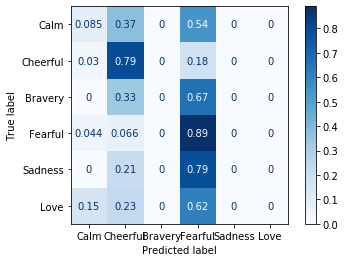

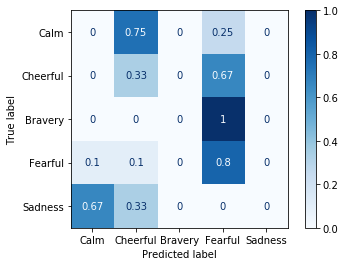

In [26]:
print_res("Vanilla",x_train[:,:5],y_train,random_search_categorical)
test_res("Vanilla",x_val[:,:5],y_val,random_search_categorical)

Best Score: 0.3164
alpha => 0.2557277072168217
fit_prior => False
Splits: 5
Random Oversampling Train Accuracy: 32.1168%
Random Oversampling Validation Accuracy: 13.64%


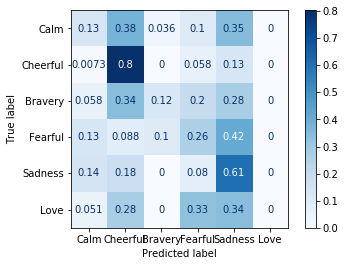

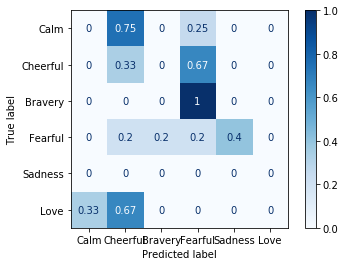

In [27]:
print_res("Random Oversampling",x_os[:,:5],y_os,random_search_categorical)
test_res("Random Oversampling",x_val[:,:5],y_val,random_search_categorical)

Best Score: 0.3797
alpha => 0.010145991301233392
fit_prior => True
Splits: 5
SMOTE Train Accuracy: 39.5377%
SMOTE Validation Accuracy: 13.64%


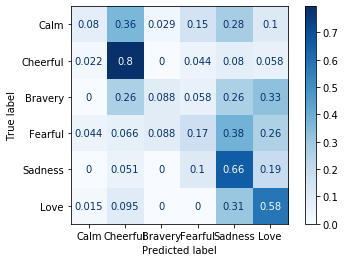

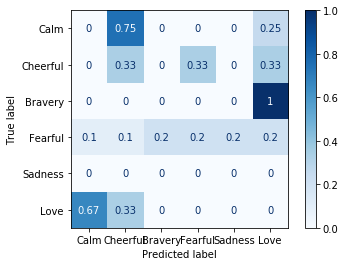

In [28]:
print_res("SMOTE",x_smote[:,:5],y_smote,random_search_categorical)
test_res("SMOTE",x_val[:,:5],y_val,random_search_categorical)

In [29]:
# MultinomialNB, RandomizedSearch
random_search_iterations = 1000
k_folds = 5

parameters = {
    'alpha':uniform(loc=0,scale=1.0), 
    'fit_prior':[True, False]
}
mnb = MultinomialNB()
random_search_multinomial = RandomizedSearchCV(mnb, parameters,cv=k_folds,\
                                            n_iter=random_search_iterations,\
                                            random_state=rand_seed,n_jobs=-1)

Best Score: 0.4616
alpha => 0.9895026653079263
fit_prior => True
Splits: 5
Vanilla Train Accuracy: 55.4156%
Vanilla Validation Accuracy: 27.27%


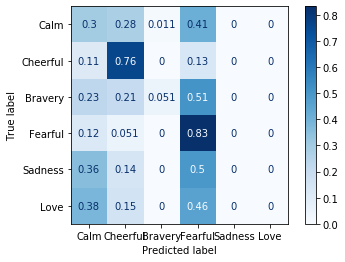

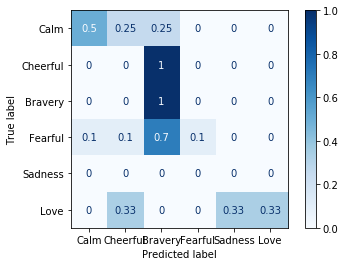

In [30]:
print_res("Vanilla",x_train,y_train,random_search_multinomial)
test_res("Vanilla",x_val,y_val,random_search_multinomial)

Best Score: 0.3591
alpha => 0.9868336008547082
fit_prior => False
Splits: 5
Random Oversampling Train Accuracy: 37.1046%
Random Oversampling Validation Accuracy: 13.64%


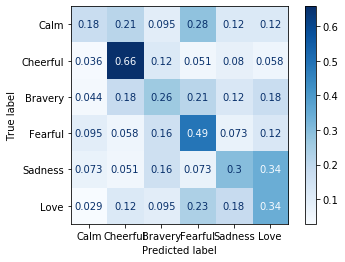

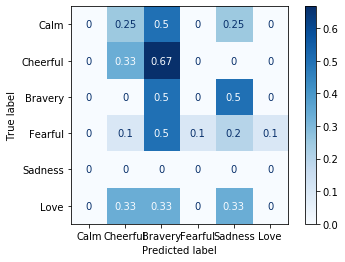

In [31]:
print_res("Random Oversampling",x_os,y_os,random_search_multinomial)
test_res("Random Oversampling",x_val,y_val,random_search_multinomial)

Best Score: 0.3883
alpha => 0.9868336008547082
fit_prior => False
Splits: 5
SMOTE Train Accuracy: 42.3358%
SMOTE Validation Accuracy: 27.27%


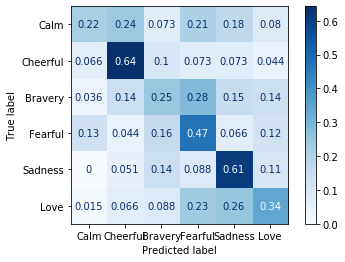

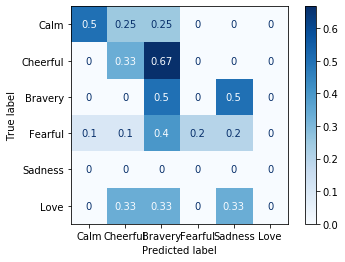

In [32]:
print_res("SMOTE",x_smote,y_smote,random_search_multinomial)
test_res("SMOTE",x_val,y_val,random_search_multinomial)